# Cover Type Classification 

In this project, I will use deep learning to predict forest cover type (the most common kind of tree cover) based only on cartographic variables. The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. The covertypes are the following:

* Spruce/Fir
* Lodgepole Pine
* Ponderosa Pine
* Cottonwood/Willow
* Aspen
* Douglas-fir
* Krummholz

Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is raw and has not been scaled or preprocessed for you. It contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so existing forest cover types are mainly a result of ecological processes rather than forest management practices.

Project Objectives:
Develop one or more classifiers for this multi-class classification problem.
Use TensorFlow with Keras to build your classifier(s).
Use your knowledge of hyperparameter tuning to improve the performance of your model(s).
Test and analyze performance.

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [47]:
# read dataset into dataframe

df = pd.read_csv("C:\\Users\\Rene\\Documents\\Datascience\\Codecademy\\projects\\Portfolio Projects\\Forest_Cover_Classification\\data\\cover_data.csv")


# 1. EDA

In [48]:
df.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [49]:
df.shape

(581012, 55)

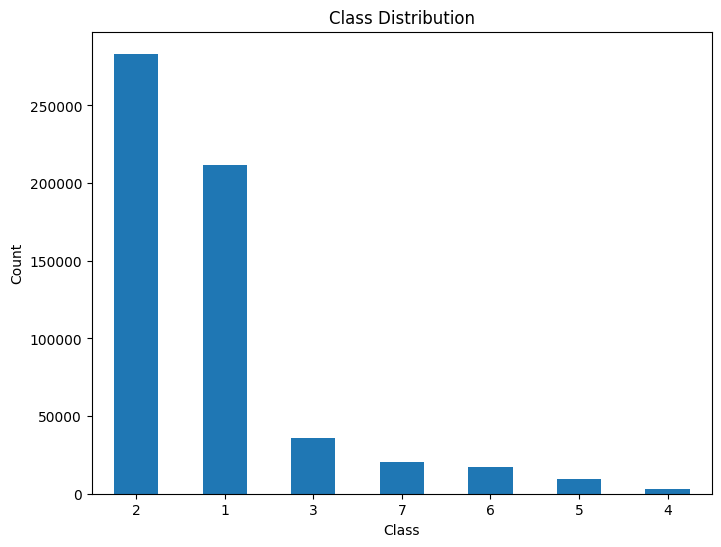

In [50]:
class_distribution = df['class'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [51]:
missing_values = df.isnull().sum()
print(missing_values)

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [52]:
#Checking for categotical features:

# List of soil type features
soil_type_features = ["Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3","Wilderness_Area4", "Soil_Type1","Soil_Type2","Soil_Type3","Soil_Type4","Soil_Type5","Soil_Type6","Soil_Type7","Soil_Type8","Soil_Type9","Soil_Type10","Soil_Type11","Soil_Type12","Soil_Type13","Soil_Type14","Soil_Type15","Soil_Type16","Soil_Type17","Soil_Type18","Soil_Type19","Soil_Type20","Soil_Type21","Soil_Type22","Soil_Type23","Soil_Type24","Soil_Type25","Soil_Type26","Soil_Type27","Soil_Type28","Soil_Type29","Soil_Type30","Soil_Type31","Soil_Type32", "Soil_Type33", "Soil_Type34", "Soil_Type35", "Soil_Type36",
                      "Soil_Type37", "Soil_Type38", "Soil_Type39", "Soil_Type40"]

# Iterate over soil type features
for feature in soil_type_features:
    unique_values = df[feature].unique()
    print(f"Unique values in {feature}: {unique_values}")

Unique values in Wilderness_Area1: [1 0]
Unique values in Wilderness_Area2: [0 1]
Unique values in Wilderness_Area3: [0 1]
Unique values in Wilderness_Area4: [0 1]
Unique values in Soil_Type1: [0 1]
Unique values in Soil_Type2: [0 1]
Unique values in Soil_Type3: [0 1]
Unique values in Soil_Type4: [0 1]
Unique values in Soil_Type5: [0 1]
Unique values in Soil_Type6: [0 1]
Unique values in Soil_Type7: [0 1]
Unique values in Soil_Type8: [0 1]
Unique values in Soil_Type9: [0 1]
Unique values in Soil_Type10: [0 1]
Unique values in Soil_Type11: [0 1]
Unique values in Soil_Type12: [0 1]
Unique values in Soil_Type13: [0 1]
Unique values in Soil_Type14: [0 1]
Unique values in Soil_Type15: [0 1]
Unique values in Soil_Type16: [0 1]
Unique values in Soil_Type17: [0 1]
Unique values in Soil_Type18: [0 1]
Unique values in Soil_Type19: [0 1]
Unique values in Soil_Type20: [0 1]
Unique values in Soil_Type21: [0 1]
Unique values in Soil_Type22: [0 1]
Unique values in Soil_Type23: [0 1]
Unique values in 

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [54]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [55]:
# Split the data into features (X) and target labels (y)
X = df.drop("class", axis=1)  # Features: Remove the target column
y = df["class"]  # Target labels

In [56]:
# Replace 'features' and 'labels' with your actual feature and label arrays/dataframes
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Assuming your dataset is stored in a DataFrame called 'df'
continuous_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                       'Horizontal_Distance_To_Fire_Points']

categorical_features = [col for col in df.columns if col not in continuous_features]

# Split continuous and categorical features
X_continuous = df[continuous_features]
X_categorical = df[categorical_features]

In [57]:
# Print the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (464809, 54)
X_test shape: (145253, 54)
y_train shape: (464809,)
y_test shape: (145253,)


In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Simple Models
## 2.1 Logistic Regression

In [ ]:
def train_and_evaluate_lr(X_train, y_train, X_test, y_test, max_iter=1000):
    """
    Trains a Logistic Regression model, predicts on the test set,
    and calculates accuracy and precision scores.

    Parameters:
        X_train (numpy.ndarray): Training features.
        y_train (numpy.ndarray): Training labels.
        X_test (numpy.ndarray): Test features.
        y_test (numpy.ndarray): Test labels.
        max_iter (int): Maximum number of iterations for optimization (default: 1000).

    Returns:
        accuracy (float): Accuracy score on the test set.
        precision (float): Weighted precision score on the test set.
    """
    lr_model = LogisticRegression(max_iter=max_iter)
    lr_model.fit(X_train, y_train)

    y_pred_lr = lr_model.predict(X_test)

    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    precision_lr = precision_score(y_test, y_pred_lr, average='weighted')

    return accuracy_lr, precision_lr

# Usage
accuracy_lr, precision_lr = train_and_evaluate_lr(X_train, y_train, X_test, y_test, max_iter=1000)
print("Logistic Regression:")
print(f"Accuracy: {accuracy_lr:.2f}")
print(f"Precision: {precision_lr:.2f}")

Logistic Regression <br>
max_iter = 10000 <br>
Accuracy: 0.70 <br>
Precision: 0.68 <br>
Max iter reached after 26m35.0s

Logistic Regression <br>
max_iter = 1000 <br>
Accuracy: 0.68 <br>
Precision: 0.65 <br>
Max iter reached after 2m40.0s

## 2.2 Random Forest

c:\Users\Rene\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Rene\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Rene\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\User

ValueError: x and y must have same first dimension, but have shapes (4,) and (12,)

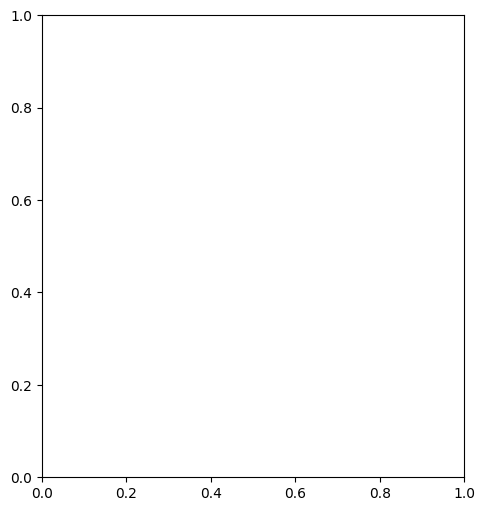

In [62]:
# Vary the number of trees and max depth for experimentation
n_estimators_list = [10, 50, 100, 200]
max_depth_list = [5, 10, 20]

# Lists to store results
accuracies_train = []
precisions_train = []
accuracies_val = []
precisions_val = []

# Lists to store x values (for plotting)
x_values = []  # Store tuples of (n_estimators, max_depth)

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        # Store the current combination of n_estimators and max_depth
        x_values.append((n_estimators, max_depth))

        # Create and train Random Forest model
        rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf_model.fit(X_train, y_train)
        
        # ... Rest of your code ...

# Plotting the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_values, accuracies_train, label='Train Accuracy')
plt.plot(x_values, accuracies_val, label='Validation Accuracy')
plt.xlabel('(Number of Trees, Max Depth)')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_values, precisions_train, label='Train Precision')
plt.plot(x_values, precisions_val, label='Validation Precision')
plt.xlabel('(Number of Trees, Max Depth)')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()

Random Forest Classifier: <br>
Accuracy: 0.95 <br>
Precision: 0.95 <br>
finished after 2m31.6s <br>

# 3. Deep Learning Models

In [ ]:
# Define continuous input
continuous_input = Input(shape=(num_continuous_features,))
dense_continuous = Dense(64, activation='relu')(continuous_input)

# Define one-hot-encoded categorical inputs
categorical_inputs = []
for i in range(num_categorical_features):
    cat_input = Input(shape=(num_categories,))
    dense_cat = Dense(32, activation='relu')(cat_input)
    categorical_inputs.append(dense_cat)

# Concatenate continuous and categorical branches
concatenated = Concatenate()([dense_continuous] + categorical_inputs)

# Additional hidden layers and output layer
hidden_layer = Dense(128, activation='relu')(concatenated)
dropout_layer = Dropout(0.3)(hidden_layer)
output_layer = Dense(num_classes, activation='softmax')(dropout_layer)

# Build the model
model = Model(inputs=[continuous_input] + categorical_inputs, outputs=output_layer)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Visualize the model
plot_model(model, to_file='model_visualization.png', show_shapes=True, show_layer_names=True)